In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para renderear el texto de los gráficos de matplotlib con LaTeX, descomentar plt.rcdefaults() para desctivarlo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# plt.rcdefaults()

df = pd.read_csv("output.csv")
df.head()
df.shape


(2000, 7)

In [10]:
# Ajusto los #SEQ

df['#SEQ'] = range(df.shape[0])

In [14]:
# Saco outliers
df = df[df['total_time'] <= 10]
df['total_time'].sort_values(ascending=False)

276     5.014753
964     5.014406
301     5.014109
268     5.014093
971     5.014050
          ...   
151     0.000000
1835    0.000000
1156    0.000000
366     0.000000
1999    0.000000
Name: total_time, Length: 2000, dtype: float64

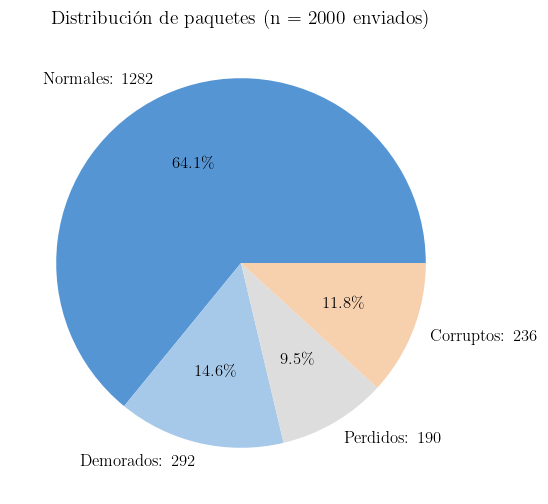

In [34]:
plt.figure(figsize=(10, 6))
cant_enviados = df.shape[0]
cant_recibidos = (df['time_received'] != 0).sum()
cant_corruptos = (df['corrupto'] == 1).sum()
cant_demorados = (df['demorado'] == 1).sum()
cant_perdidos = (df['time_received'] == 0).sum()
cant_normal = cant_enviados - cant_perdidos - cant_corruptos - cant_demorados

proporciones = {f'Normales: {cant_normal}': cant_normal, f'Demorados: {cant_demorados}': cant_demorados,
                f'Perdidos: {cant_perdidos}': cant_perdidos, f'Corruptos: {cant_corruptos}': cant_corruptos}

proporciones = {key: 100*value/cant_enviados for key, value in proporciones.items()}

colors = ['#5595D4', '#A7C9E9', '#DDDDDD', '#F7D0AE', '#EDA060']

plt.pie(list(proporciones.values()), labels=list(proporciones.keys()), autopct='%1.1f%%', colors=colors, textprops={'fontsize': 12})
plt.title(f'Distribución de paquetes (n = {cant_enviados} enviados)', fontsize=14)

# Para guardar la imagen
#plt.savefig('d.png', dpi=300, bbox_inches='tight')

plt.show()

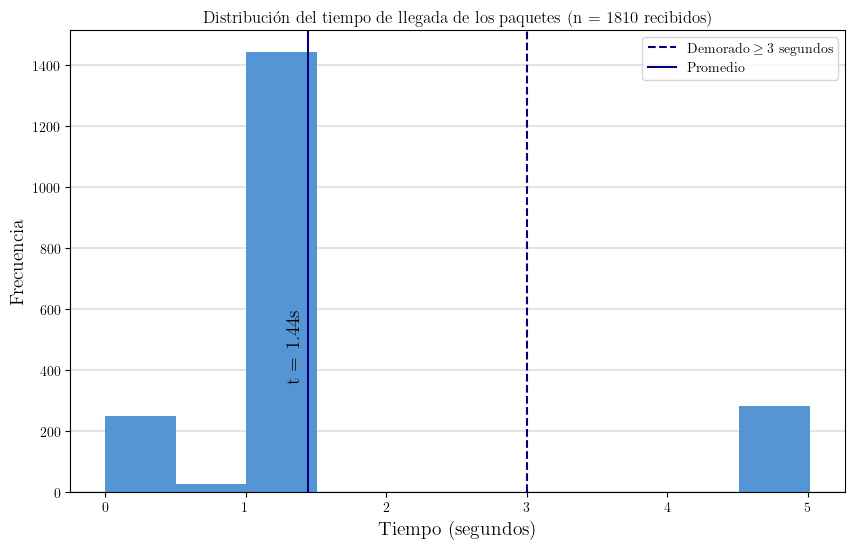

In [35]:
plt.figure(figsize=(10, 6))

plt.hist(df['total_time'], bins=10, color=colors[0], zorder=2)
plt.xlabel('Tiempo (segundos)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title(f'Distribución del tiempo de llegada de los paquetes (n = {cant_recibidos} recibidos)')
plt.grid(axis='y', linewidth=0.3, color='grey', zorder=0)


# Línea vertical en threshold de demora
plt.axvline(x=3, color='navy', linestyle='--', label=r'$\mathrm{Demorado} \geq 3 \mathrm{\ segundos}$')
promedio_tiempo = np.mean(df['total_time'])
plt.axvline(x=promedio_tiempo, color='navy', linestyle='-', label='Promedio')
    
plt.text(promedio_tiempo-0.1, cant_recibidos/3, f't = {round(promedio_tiempo, 2)}s', 
         color='black', fontsize=14, ha='center', va='top', rotation=90)

plt.legend()

# Para guardar la imagen
#plt.savefig('dist-tiempos-llegada.png', dpi=300, bbox_inches='tight')

plt.show()

In [3]:
df_test = pd.read_csv("output_test.csv")
# Ajusto los #SEQ

df_test['#SEQ'] = range(df_test.shape[0])
